In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My Drive/Datasets/perfect_lyrics

/content/drive/My Drive/Datasets/perfect_lyrics


In [4]:
ls

perfect_lyrics.txt


In [0]:
data = open('perfect_lyrics.txt').read()
corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#creating input sequence
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

#padding sequence
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

#making input and output

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


W0707 12:29:51.775847 139818706085760 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0707 12:29:51.806474 139818706085760 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0707 12:29:51.813207 139818706085760 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 11, 100)           12900     
_________________________________________________________________
bidirectional (Bidirectional (None, 11, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 11, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dense_1 (Dense)              (None, 129)               8385      
Total params: 489,349
Trainable params: 489,349
Non-trainable params: 0
__________________________________________________

In [13]:
 history = model.fit(predictors, label, epochs=200, verbose=1)

Epoch 1/200
254/254 [==============================] - 1s 2ms/sample - loss: 1.8879 - acc: 0.5197
Epoch 2/200
254/254 [==============================] - 0s 2ms/sample - loss: 1.8824 - acc: 0.5433
Epoch 3/200
254/254 [==============================] - 1s 2ms/sample - loss: 1.8679 - acc: 0.5394
Epoch 4/200
254/254 [==============================] - 1s 2ms/sample - loss: 1.8713 - acc: 0.5394
Epoch 5/200
254/254 [==============================] - 0s 2ms/sample - loss: 1.8734 - acc: 0.5394
Epoch 6/200
254/254 [==============================] - 0s 2ms/sample - loss: 1.8301 - acc: 0.5315
Epoch 7/200
254/254 [==============================] - 0s 2ms/sample - loss: 1.8273 - acc: 0.5433
Epoch 8/200
254/254 [==============================] - 0s 2ms/sample - loss: 1.8118 - acc: 0.5591
Epoch 9/200
254/254 [==============================] - 0s 2ms/sample - loss: 1.8259 - acc: 0.5472
Epoch 10/200
254/254 [==============================] - 0s 2ms/sample - loss: 1.7782 - acc: 0.5669
Epoch 11/200
254/25

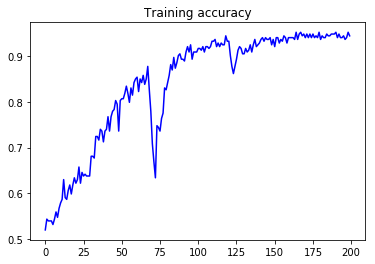

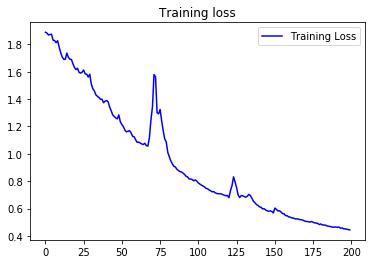

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
seed_text = "She shares my dreams"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

She shares my dreams i hope that someday i'll share her home home her
